# Import libraries 


In [5]:
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure,io, color, feature
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_curve, auc
from sklearn.preprocessing import LabelEncoder,label_binarize
from sklearn.linear_model import LogisticRegression

# hog features extraction function

In [6]:
def extract_hog_features(image):
    hog_features, hog_image = feature.hog(image, visualize=True)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    return hog_features, hog_image_rescaled

# import dataset

In [8]:
dataset_path = 'C:\\Me__ee\\ai course\\image\\data set image\\Font\\font2'

# read images from data file

In [9]:

# List all subdirectories (assuming each subdirectory corresponds to a class)
class_folders = [f.path for f in os.scandir(dataset_path) if f.is_dir()]
features_list=[]
labels_list=[]



for class_folder in class_folders:
    class_name = os.path.basename(class_folder)
    for image_filename in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_filename)


        image = io.imread(image_path)

        hog_features, hog_image = extract_hog_features(image)

        #fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2, 2), sharex=True, sharey=True)

        #ax1.axis('off')
        #ax1.imshow(image, cmap=plt.cm.gray)

        #ax2.axis('off')
        #ax2.imshow(hog_image, cmap=plt.cm.gray)

        #plt.show()
        features_list.append(hog_features)
        labels_list.append(class_name)



# Convert lists to NumPy arrays

In [10]:
features_array = np.array(features_list)
labels_array = np.array(labels_list)



# use LabelEncoder to convert labels into numeric labels

In [11]:
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(labels_array)
print(features_array)
print(numeric_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0 0 0 ... 9 9 9]


# split the dataset into training and testing 

In [12]:

X_train, X_test, y_train, y_test = train_test_split(features_array, numeric_labels, test_size=0.2, random_state=42)


# fit the data to the model 

In [13]:
classifier = LogisticRegression(random_state = 42,max_iter=1000,multi_class="multinomial")
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

# predict the testing data

In [14]:
y_pred =classifier.predict(X_test)

# plot the confusion matrix

In [15]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
#f1 score ,recall, precision

[[221   0   0   0   0   0   0   0   0   0]
 [  0 206   0   0   0   0   0   0   0   0]
 [  0   0 200   0   0   0   0   0   0   0]
 [  0   0   0 217   0   0   0   0   0   0]
 [  0   0   0   0 201   0   0   0   0   0]
 [  0   0   0   0   0 190   0   0   0   0]
 [  0   0   0   0   0   0 203   0   0   0]
 [  0   1   0   0   0   0   0 197   0   0]
 [  0   0   0   0   0   0   1   0 199   0]
 [  0   0   2   0   0   0   0   0   0 194]]


0.9980314960629921

Text(0.5, 1.0, 'confusion_matrix')

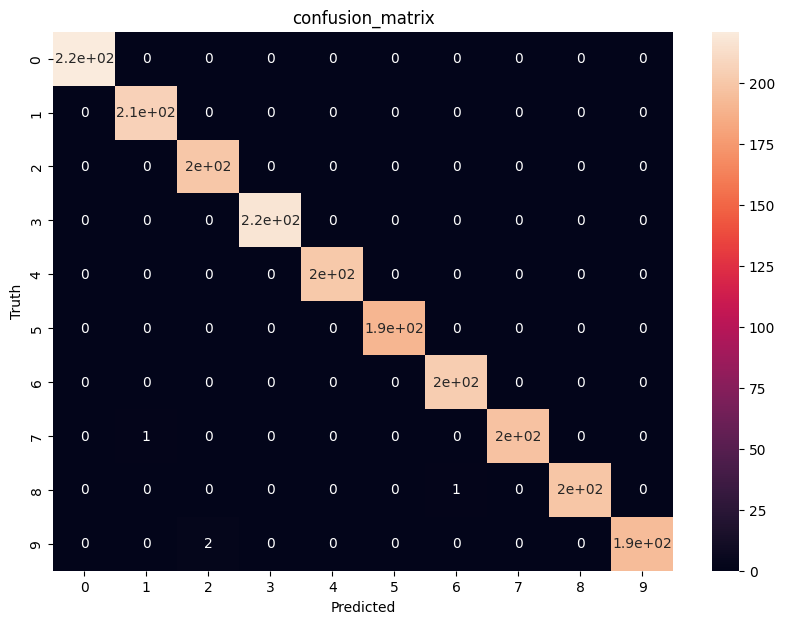

In [16]:
%matplotlib inline
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('confusion_matrix')

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       221
           1       1.00      1.00      1.00       206
           2       0.99      1.00      1.00       200
           3       1.00      1.00      1.00       217
           4       1.00      1.00      1.00       201
           5       1.00      1.00      1.00       190
           6       1.00      1.00      1.00       203
           7       1.00      0.99      1.00       198
           8       1.00      0.99      1.00       200
           9       1.00      0.99      0.99       196

    accuracy                           1.00      2032
   macro avg       1.00      1.00      1.00      2032
weighted avg       1.00      1.00      1.00      2032



# print the model score on the data

In [19]:
score=classifier.score(X_train,y_train)
print(score)

1.0


In [20]:
score=classifier.score(X_test,y_test)
score

0.9980314960629921

In [21]:
#from sklearn.metrics import mean_squared_error
#from math import sqrt
#mse=mean_squared_error(y_test, y_pred)
#print("mean squared error=",mse)
#rmse=mse**(1/2)
#print("root mean squared error=",rmse)

mean squared error= 0.06791338582677166
root mean squared error= 0.2606019681943551


# plot the roc curve and calculate the area under the curve

In [22]:
y_pred_probs =classifier.predict_proba(X_test)[:, 1]
print(y_pred_probs[0])


7.609443422481169e-07


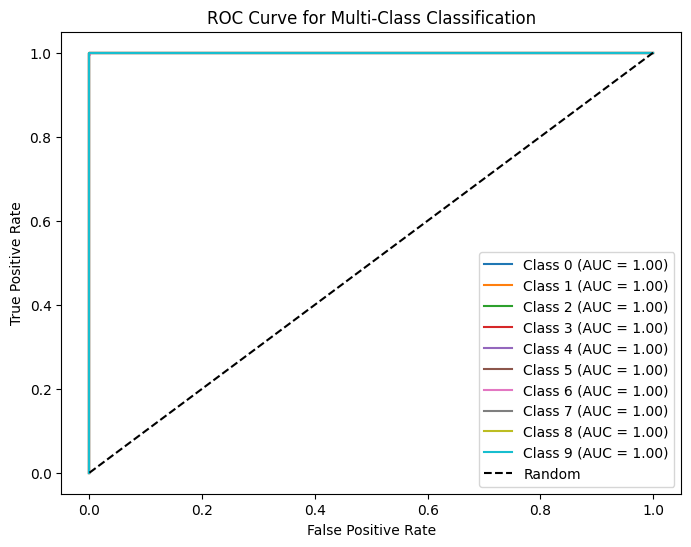

In [23]:
y_bin = label_binarize(y_test, classes=[0, 1, 2,3,4,5,6,7,8,9])
y_score =classifier.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len([0, 1, 2,3,4,5,6,7,8,9])):  
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))

for i in range(len([0, 1, 2,3,4,5,6,7,8,9])):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()

# apply cross validation on the model

In [24]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=6, shuffle=True, random_state=42)
cv_results = cross_val_score(classifier,features_array,numeric_labels, cv=kf)

In [25]:
print(cv_results)


[0.99822904 0.99527745 0.99527466 0.99704666 0.99881867 0.99881867]


In [26]:
print(np.mean(cv_results), np.std(cv_results))

0.997244191130783 0.0015118427680215823


In [27]:
print(np.quantile(cv_results, [0.025, 0.975]))

[0.99527501 0.99881867]


In [81]:
dataset2_path = 'D:\\ML\\3'

In [ ]:
List all subdirectories (assuming each subdirectory corresponds to a class)
class_folders2 =[ 'D:\ML\3']
features_list2=[]
labels_list2=[]



for class_folder2 in class_folders2:
    class_name2 = os.path.basename(class_folder2)
    for image_filename2 in os.listdir(class_folder2):
        image_path2 = os.path.join(class_folder2, image_filename2)


        image2 = io.imread(image_path2)

        hog_features2, hog_image2 = extract_hog_features(image2)

        #fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2, 2), sharex=True, sharey=True)

        #ax1.axis('off')
        #ax1.imshow(image, cmap=plt.cm.gray)

        #ax2.axis('off')
        #ax2.imshow(hog_image, cmap=plt.cm.gray)

        #plt.show()
        features_list2.append(hog_features2)
        labels_list2.append(class_name2)


In [87]:
features_array3 = np.array(features_list)